# GPU Programming Concepts

Welcome to the webinar _GPU Programming Concepts_. In this webinar you will learn several techniques for scaling single GPU applications to multi-GPU and multiple nodes, with an emphasis on [NCCL (NVIDIA Collective Communications Library)](https://docs.nvidia.com/deeplearning/sdk/nccl-developer-guide/docs/index.html), [CUDA-aware MPI](https://developer.nvidia.com/blog/introduction-cuda-aware-mpi/), and [NVSHMEM](https://developer.nvidia.com/nvshmem) which allows for elegant multi-GPU application code and has been proven to scale very well on systems with many GPUs.

## The Coding Environment

The first step is display information about the CPU architecture with the command `lscpu`

In [1]:
!lscpu

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                72
On-line CPU(s) list:   0-71
Thread(s) per core:    2
Core(s) per socket:    18
Socket(s):             2
NUMA node(s):          2
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 85
Model name:            Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz
Stepping:              7
CPU MHz:               2601.000
CPU max MHz:           2601,0000
CPU min MHz:           1000,0000
BogoMIPS:              5200.00
Virtualization:        VT-x
L1d cache:             32K
L1i cache:             32K
L2 cache:              1024K
L3 cache:              25344K
NUMA node0 CPU(s):     0-17,36-53
NUMA node1 CPU(s):     18-35,54-71
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl 

In this node, we can observe that the multi-GPU resources connect with the NUMA nodes.

For your work today, you have access to several GPUs in the cloud. Run the following cell to see the GPUs available to you today.

In [2]:
!nvidia-smi topo -m 

	GPU0	GPU1	GPU2	GPU3	mlx5_0	mlx5_1	CPU Affinity	NUMA Affinity
GPU0	 X 	NV2	NV2	NV2	PIX	SYS	0-17,36-53	0
GPU1	NV2	 X 	NV2	NV2	PIX	SYS	0-17,36-53	0
GPU2	NV2	NV2	 X 	NV2	SYS	PIX	18-35,54-71	1
GPU3	NV2	NV2	NV2	 X 	SYS	PIX	18-35,54-71	1
mlx5_0	PIX	PIX	SYS	SYS	 X 	SYS		
mlx5_1	SYS	SYS	PIX	PIX	SYS	 X 		

Legend:

  X    = Self
  SYS  = Connection traversing PCIe as well as the SMP interconnect between NUMA nodes (e.g., QPI/UPI)
  NODE = Connection traversing PCIe as well as the interconnect between PCIe Host Bridges within a NUMA node
  PHB  = Connection traversing PCIe as well as a PCIe Host Bridge (typically the CPU)
  PXB  = Connection traversing multiple PCIe bridges (without traversing the PCIe Host Bridge)
  PIX  = Connection traversing at most a single PCIe bridge
  NV#  = Connection traversing a bonded set of # NVLinks


While your work today will be on a single node, all the techniques you learn today, in particular CUDAWARE-MPI and NVSHMEM, can be used to run your applications across clusters of multi-GPU nodes.

Let us show the NVLink Status for different GPUs reported from `nvidia-smi`:

In [3]:
!nvidia-smi nvlink --status -i 0

GPU 0: Tesla V100-SXM2-32GB (UUID: GPU-9c55d5eb-25c4-1a8f-03cf-4c7d95a850f4)
	 Link 0: 25.781 GB/s
	 Link 1: 25.781 GB/s
	 Link 2: 25.781 GB/s
	 Link 3: 25.781 GB/s
	 Link 4: 25.781 GB/s
	 Link 5: 25.781 GB/s


In the end, it gives information about the NUMA memory nodes, with tue `lstopo` command, that is used to show the topology of the system.  

In [ ]:
#!lstopo --of png > ogbon.png

This will import and display a ``.png`` image in Jupyter:

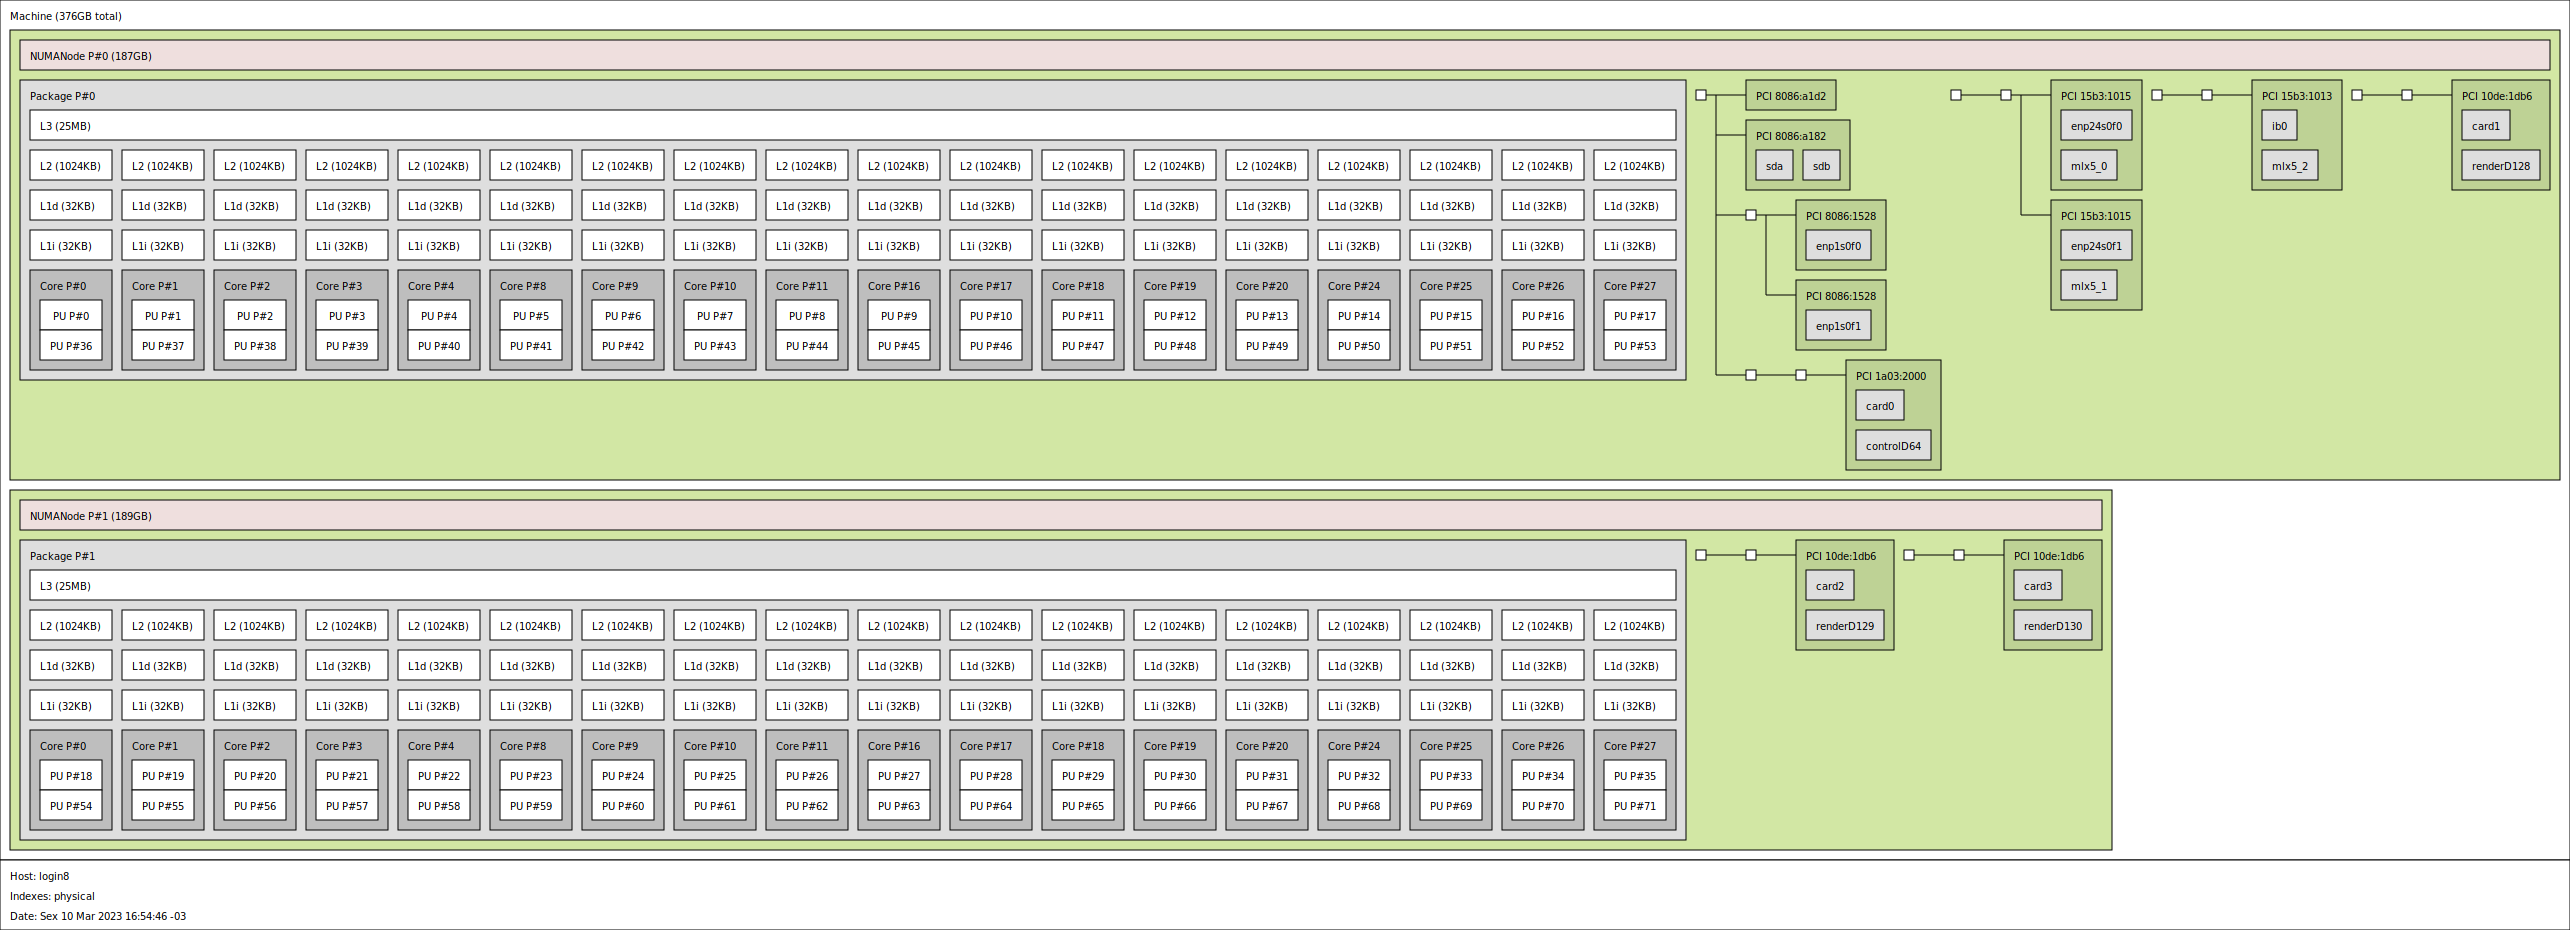

In [4]:
from IPython.display import display
from PIL import Image
path="ogbon.png"
display(Image.open(path))

## Environment Modules on OGBON

These modules must be initialized before running the jupyter-notebook:
```cpp
Currently Loaded Modulefiles:
    1) cuda/12.0                          
    2) openmpi/4.0.5-cuda-11.6-ofed-5.4   
    3) ucx/1.13.1-cuda-12.0
    4) ucx/1.12.0-cuda-11.6-ofed-5.4      
    5) anaconda3/2022.05                  
    6) openmpi/4.1.4-gcc-cuda-12.0
    7) gcc/11.1.0                                                   
    8) nvshmem/2.8.0        
```

## Table of Contents

During this short course today you will work through each of the following notebooks:

- [_NCCL_](2-OGBON-NCCL-P2P.ipynb): In this notebook you will introduced the NCCL API, and the concepts of peer-to-peer communication between GPUs.

- [_CUDA-aware MPI_](3-OGBON-CUDAWARE-MPI.ipynb): You will begin by familiarizing with the concepts of CUDA-aware MPI API to multi-GPU nodes.

- [_Monte Carlo Approximation of $\pi$ - Single GPU_](4-OGBON-MCπ-SGPU.ipynb): You will begin by familiarizing yourself with a single GPU implementation of the monte-carlo approximation of π algorithm, which we will use to introduce many multi-GPU programming paradigms.

- [_Monte Carlo Approximation of $\pi$ - Multiple GPUs_](5-OGBON-MCπ-MGPU.ipynb): In this notebook you will extend the monte-carlo π program to run on multiple GPUs by looping over available GPU devices.

- [_Monte Carlo Approximation of $\pi$ - CUDA-aware MPI_](6-OGBON-MCπ-CUDAWARE-MPI): In this notebook you will learn how to applied the CUDA-aware MPI, and some concepts about peer-to-peer communication between GPUs in the SPMD paradigm.

- [_Monte Carlo Approximation of $\pi$ - NVSHMEM_](7-OGBON-MCπ-NVSHMEM.ipynb): In this notebook you will be introduced to NVSHMEM, and will take your first pass with it using the monte-carlo π program.

- [_Jacobi Iteration_](8-OGBON-Jacobi.ipynb): In this notebook you will be introduced to a Laplace equation solver using Jacobi iteration and will learn how to use NVSHMEM to handle boundary communications between multiple GPUs.

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

In the next section, you will see  how to learn the GPU concepts using the API NCCL [_2-OGBON-NCCL-P2P.ipynb_](2-OGBON-NCCL-P2P.ipynb)